In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pyspark example2').getOrCreate() #chaining

# RDD에서 다룰 수 있는 데이터 타입 TypeSafe
1. 비정형 데이터 - .... json, txt, str
2. 정형 데이터 - 리스트, csv, table

In [2]:
#RDD[str]
rdd1 = spark.sparkContext.textFile('learning_spark_data/log.txt')
rdd1

learning_spark_data/log.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [3]:
rdd1.take(3)

['2025-07-31 10:00:01 INFO User=kim ACTION=LOGIN RESULT=SUCCESS',
 '2025-07-31 10:05:43 WARN User=lee ACTION=DOWNLOAD RESULT=FAIL',
 '2025-07-31 10:08:22 INFO User=park ACTION=UPLOAD RESULT=SUCCESS']

In [ ]:
#RDD[dict] - data.json

In [4]:
import json
rdd2 = spark.sparkContext.textFile('learning_spark_data/data.json').map(json.loads)
rdd2

PythonRDD[5] at RDD at PythonRDD.scala:53

In [5]:
rdd2.take(3)

[{'user': 'kim',
  'action': 'login',
  'result': 'success',
  'time': '2025-07-31 10:00:01'},
 {'user': 'lee',
  'action': 'download',
  'result': 'fail',
  'time': '2025-07-31 10:05:43'},
 {'user': 'park',
  'action': 'upload',
  'result': 'success',
  'time': '2025-07-31 10:08:22'}]

In [8]:
spark.stop()

## RDD 의 데이터 읽기 패턴
1. RDD 생성 - type 지정 x
2. 형식 변환 - map()
3. take(n)

# 스파크컨텍스트 객체

1. SparkSession.getOrCreate() -> 세션객체로부터 사전에 설정된 변수에 맞춰 컨텍스트 생성
2. SparkConf + SparkContext -> 저수준 연산에 적합한 방식

In [6]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster('local').setAppName('country-student-counts2')
conf

In [ ]:
spark = SparkContext(conf = conf).getOrCreate()
#spark.stop()

In [11]:
spark.getConf().getAll()

[('spark.master', 'local'),
 ('spark.executor.id', 'driver'),
 ('spark.app.submitTime', '1754024964931'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.app.name', 'country-student-counts2'),


In [12]:
spark.stop()

In [13]:
import os
os.getcwd() # 컨테이너 내부 경로

'/home/jovyan/work'

In [14]:
dir = os.path.join( os.getcwd() , 'learning_spark_data')
dir

'/home/jovyan/work/learning_spark_data'

In [15]:
filename = 'xAPI-Edu-Data.csv'
filepath = os.path.join( dir, filename)
filepath

'/home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv'

## 외부저장소에서 데이터를 로드, RDD 생성

In [19]:
spark = SparkContext(conf = conf).getOrCreate()
#spark.stop()

In [20]:
lines = spark.textFile('file:///'+filepath.replace('\\','/'))
lines

file:////home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [22]:
lines.take(1)

['gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class']

In [23]:
lines.count() #대용량일 경우 문제 -> take(n)

481

# 데이터의 처리

In [24]:
header = lines.first()
header

'gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class'

In [25]:
datas = lines.filter(lambda row : row != header)
datas.take(3)

['M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L']

In [26]:
countries = datas.map(lambda row : row.split(',')[2])
countries

PythonRDD[7] at RDD at PythonRDD.scala:53

In [27]:
countries.take(3)

['KuwaIT', 'KuwaIT', 'KuwaIT']

In [28]:
result = countries.countByValue() #집계
result

defaultdict(int,
            {'KuwaIT': 180,
             'lebanon': 19,
             'Egypt': 9,
             'SaudiArabia': 16,
             'USA': 16,
             'Jordan': 176,
             'venzuela': 1,
             'Iran': 6,
             'Tunis': 9,
             'Morocco': 4,
             'Syria': 6,
             'Iraq': 22,
             'Palestine': 10,
             'Lybia': 6})

In [29]:
result.items()

dict_items([('KuwaIT', 180), ('lebanon', 19), ('Egypt', 9), ('SaudiArabia', 16), ('USA', 16), ('Jordan', 176), ('venzuela', 1), ('Iran', 6), ('Tunis', 9), ('Morocco', 4), ('Syria', 6), ('Iraq', 22), ('Palestine', 10), ('Lybia', 6)])

In [31]:
sorted(result.items(), key = lambda x: x[1], reverse=True)[:3]

[('KuwaIT', 180), ('Jordan', 176), ('Iraq', 22)]

In [34]:
total_su = sum(result.values()) #480명이다.
total_su

480

In [35]:
# 비율 계산
ratios = {k: round(v / total_su *100 ,2) for k,v in result.items() }
ratios

{'KuwaIT': 37.5,
 'lebanon': 3.96,
 'Egypt': 1.88,
 'SaudiArabia': 3.33,
 'USA': 3.33,
 'Jordan': 36.67,
 'venzuela': 0.21,
 'Iran': 1.25,
 'Tunis': 1.88,
 'Morocco': 0.83,
 'Syria': 1.25,
 'Iraq': 4.58,
 'Palestine': 2.08,
 'Lybia': 1.25}

<BarContainer object of 14 artists>

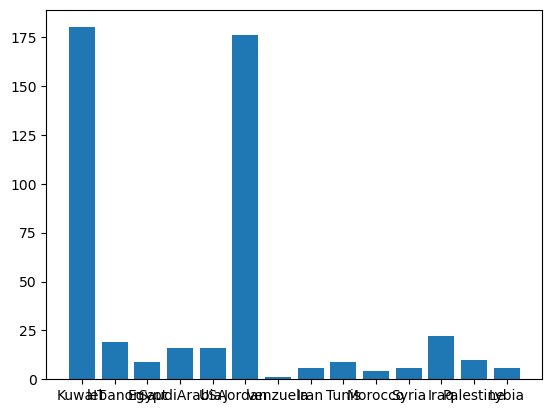

In [36]:
import matplotlib.pyplot as plt
countries = list(result.keys())
counts = list(result.values())
plt.bar(countries, counts)

# rdd 연습

In [37]:
spark = SparkSession.builder.appName('pyspark example2').getOrCreate() 


In [38]:
# 2. RDD 생성 - 기본 리스트
data = ["KuwaIT", "lebanon", "Jordan", "Jordan", "USA", "Egypt", 
        "Jordan", "USA", "Iran", "Iran", "KuwaIT"]

countries = spark.sparkContext.parallelize(data)
countries

ParallelCollectionRDD[10] at readRDDFromFile at PythonRDD.scala:289

In [40]:
# 소문자로 변환 lower()
countries_lower = countries.map(lambda x:x.lower())
countries_lower.take(5)

['kuwait', 'lebanon', 'jordan', 'jordan', 'usa']

In [41]:
# jordan 추출
jordan = countries_lower.filter(lambda x:x=='jordan')
jordan.collect()

['jordan', 'jordan', 'jordan']

In [43]:
# 몇개국인지 세어보세요 : distinct()> count()
unique_countries = countries_lower.distinct()
unique_countries.count()

6

In [ ]:
# 국가별 빈도수

In [44]:
data

['KuwaIT',
 'lebanon',
 'Jordan',
 'Jordan',
 'USA',
 'Egypt',
 'Jordan',
 'USA',
 'Iran',
 'Iran',
 'KuwaIT']

In [45]:
country_pairs = countries_lower.map(lambda x: (x,1))
country_pairs.take(1)

[('kuwait', 1)]

In [46]:
country_counts = country_pairs.reduceByKey(lambda a,b: a+b)
country_counts.take(2)

[('kuwait', 2), ('lebanon', 1)]

In [47]:
country_counts.take(6)

[('kuwait', 2),
 ('lebanon', 1),
 ('jordan', 3),
 ('usa', 2),
 ('egypt', 1),
 ('iran', 2)]

In [48]:
country_counts.collect()

[('kuwait', 2),
 ('lebanon', 1),
 ('jordan', 3),
 ('usa', 2),
 ('egypt', 1),
 ('iran', 2)]

In [50]:
country_counts.sortByKey().collect()

[('egypt', 1),
 ('iran', 2),
 ('jordan', 3),
 ('kuwait', 2),
 ('lebanon', 1),
 ('usa', 2)]

In [51]:
country_counts.sortBy( lambda x:x[1], ascending=False).collect()

[('jordan', 3),
 ('kuwait', 2),
 ('usa', 2),
 ('iran', 2),
 ('lebanon', 1),
 ('egypt', 1)]

In [52]:
countries.reduce(lambda a, b: a+','+b) #변환

'KuwaIT,lebanon,Jordan,Jordan,USA,Egypt,Jordan,USA,Iran,Iran,KuwaIT'

# 저장소에 저장하기

In [53]:
output_path = 'output/countries_result'

In [55]:
import shutil

In [56]:
output_path = 'output/countries_result'
if os.path.exists(output_path):
    shutil.rmtree(output_path)
countries.saveAsTextFile(output_path) #저장소 경로

In [58]:
spark.stop()

# mnm_dataset.csv 를 읽어서 주별 총 사탕수 구하기

# 주별, 색상별 개수

In [61]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('mnms count example')\
            .getOrCreate()

In [62]:
spark

In [63]:
rdd = spark.sparkContext.textFile('learning_spark_data/mnm_dataset.csv')

In [67]:
header = rdd.first()
data = rdd.filter(lambda line: line!= header)\
            .map(lambda line: line.split(','))

In [68]:
data.take(3)

[['TX', 'Red', '20'], ['NV', 'Blue', '66'], ['CO', 'Blue', '79']]

In [70]:
rdd1 = data.map(lambda x: (x[0], int(x[2])))
rdd1.take(3)

[('TX', 20), ('NV', 66), ('CO', 79)]

In [71]:
rdd2 = rdd1.reduceByKey(lambda a,b: a+b)
rdd2.take(3)

[('NV', 548477), ('CO', 556302), ('OR', 542169)]

In [73]:
#state, color count
rdd3 = data.map(lambda x: ((x[0], x[1]), int(x[2])))\
        .reduceByKey(lambda a,b: a+b)
rdd3.take(3)

[(('NV', 'Blue'), 90003), (('CO', 'Blue'), 93412), (('OR', 'Blue'), 90526)]

In [74]:
rdd3.collect()

[(('NV', 'Blue'), 90003),
 (('CO', 'Blue'), 93412),
 (('OR', 'Blue'), 90526),
 (('WA', 'Yellow'), 92920),
 (('OR', 'Green'), 89578),
 (('NV', 'Green'), 91331),
 (('AZ', 'Blue'), 89971),
 (('NV', 'Red'), 89346),
 (('TX', 'Brown'), 90736),
 (('CO', 'Red'), 89465),
 (('AZ', 'Green'), 91882),
 (('NM', 'Yellow'), 92747),
 (('WY', 'Yellow'), 87800),
 (('CO', 'Orange'), 90971),
 (('NV', 'Orange'), 93929),
 (('CA', 'Green'), 93505),
 (('UT', 'Red'), 90995),
 (('CA', 'Red'), 91527),
 (('TX', 'Yellow'), 93819),
 (('AZ', 'Orange'), 91684),
 (('AZ', 'Red'), 90042),
 (('CA', 'Blue'), 89123),
 (('UT', 'Green'), 88392),
 (('WA', 'Brown'), 93082),
 (('OR', 'Red'), 90286),
 (('UT', 'Blue'), 89977),
 (('NM', 'Brown'), 93447),
 (('WY', 'Brown'), 86110),
 (('CA', 'Orange'), 90311),
 (('OR', 'Orange'), 94514),
 (('CO', 'Green'), 93724),
 (('UT', 'Orange'), 91341),
 (('TX', 'Red'), 95404),
 (('WY', 'Blue'), 91002),
 (('CA', 'Yellow'), 100956),
 (('WA', 'Green'), 96486),
 (('TX', 'Green'), 95753),
 (('AZ', '

In [ ]:
# output 으로 내보내기

In [75]:
output_path = 'output/mnms_result'
if os.path.exists(output_path):
    shutil.rmtree(output_path)
rdd3.saveAsTextFile(output_path) #저장소 경로

In [78]:
!python 02_mnms_result_load.py

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/04 01:49:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/08/04 01:49:10 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/08/04 01:49:10 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
결과 미리보기----
(('TX', 'Red'), 95404)
(('WY', 'Blue'), 91002)
(('CA', 'Yellow'), 100956)
(('WA', 'Green'), 96486)
(('TX', 'Green'), 95753)
총 데이터 라인 수 : 60
